In [36]:
# %%bash
# pip install torch torchvision torchaudio scipy pandas matplotlib -q 


In [1]:
"""
Micah Holness
10/13/2024
CSC 8850
"""
import numpy as np
import torch
import scipy.io.wavfile as sw
import scipy.signal as ss
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import time

import IPython.display as ipd

In [6]:
m = torch.nn.Conv2d(2, 2, 3, stride=2)
input = torch.randn(1, 2, 3, 3)
print(input)
output = m(input)
print(output)
m.weight.data


tensor([[[[ 2.8017, -0.3122,  0.8548],
          [-0.2392, -0.0552,  0.7834],
          [ 1.2968,  1.0097, -0.2786]],

         [[-0.2972,  0.2218,  0.7323],
          [-0.0793,  0.1700, -0.4498],
          [-1.1541, -1.3262, -1.2300]]]])
tensor([[[[-1.2452]],

         [[ 0.1764]]]], grad_fn=<ConvolutionBackward0>)


tensor([[[[-0.2027, -0.1212, -0.2175],
          [ 0.1153,  0.2167, -0.1349],
          [-0.0309, -0.2017, -0.1915]],

         [[-0.1988,  0.1208,  0.0711],
          [-0.0173,  0.0128,  0.0959],
          [-0.0144, -0.0472,  0.1181]]],


        [[[ 0.0808,  0.0793,  0.0241],
          [ 0.0908, -0.2126, -0.0304],
          [-0.0261,  0.2040, -0.1072]],

         [[ 0.0852,  0.1948, -0.1612],
          [-0.1842,  0.0180,  0.0308],
          [ 0.0840, -0.0089, -0.0924]]]])

In [7]:
img_root = "./TechCabal Ewe Audio Files/"
csv_data = pd.read_csv('./Train.csv', sep=',')
print(csv_data.keys())
images = csv_data['audio_filepath']
labels = csv_data['class']

Index(['id', 'audio_filepath', 'duration', 'class'], dtype='object')


In [8]:
unique_labels = np.unique(labels)
print(unique_labels)
labels_class = np.arange(0,len(np.unique(labels)))
print(labels_class)

['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']
[0 1 2 3 4 5 6 7]


In [44]:
lengths = []
all_fs = []
durations = []
for idx, fpath in enumerate(images):
    fs, data = sw.read(os.path.join(img_root, fpath))
    lengths.append(data.shape[0])
    all_fs.append(fs)
    durations.append(data.shape[0]/fs)
    if durations[-1] > 4:
        print(fpath, durations[-1])
print(np.mean(lengths), np.std(lengths))
print(np.mean(all_fs), np.std(all_fs))
print(np.mean(durations), np.std(durations))

88425.0613048369 21091.735322382556
47923.95950506187 539.2362871583119
1.844374940377351 0.4368196598113251


In [25]:
np.max(all_fs)

48000

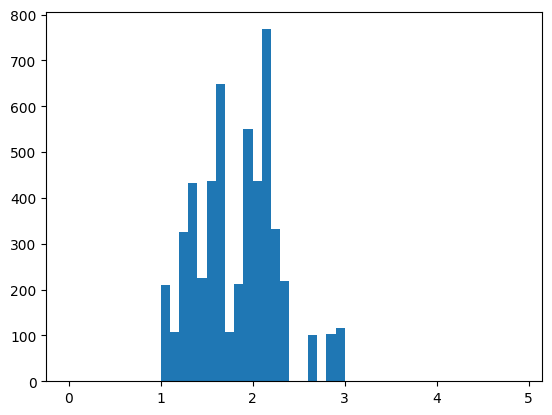

In [21]:
plt.hist(durations, bins=np.arange(0, 5, 0.1))
plt.show()


In [45]:
csv_data_test = pd.read_csv('./Test_1.csv', sep=',')
images_test = csv_data_test['audio_filepath']
lengths_test = []
all_fs_test = []
durations_test = []
c = 0
for idx, fpath in enumerate(images_test):
    fs, data = sw.read(os.path.join(img_root, fpath))
    lengths_test.append(data.shape[0])
    all_fs_test.append(fs)
    durations_test.append(data.shape[0]/fs)
    if durations_test[-1] > 4:
        c+=1
        print(fpath, durations_test[-1])
print(c)
print(np.mean(lengths_test), np.std(lengths_test))
print(np.mean(all_fs_test), np.std(all_fs_test))
print(np.mean(durations_test), np.std(durations_test))

id_jzil0fw5vs.wav 4.331
id_m51nv5y01k.wav 6.315
id_rz4v8tbb5l.wav 6.187
id_z461kcetbd.wav 6.315
id_4luq4gbtol.wav 5.44
id_ukhyqm7ags.wav 7.765
id_wgi6n97wvx.wav 4.117
id_ani9vt3h7r.wav 5.44
id_zdlvvwtwm7.wav 5.909
id_75cyzltqji.wav 6.187
id_3s0utoyagg.wav 6.187
id_pcdt0a0urb.wav 5.995
id_6zszv1h7ev.wav 7.765
id_boaifsrdao.wav 6.187
id_dyi1h5a5gj.wav 7.765
id_ydfthrwqd4.wav 4.117
id_vwu2k3cjgo.wav 6.315
id_mmrypzt2h4.wav 5.909
id_su0d7d27tg.wav 7.765
id_8gs02y2uix.wav 5.44
id_2nn7idy7v6.wav 6.187
id_xm1ktemc98.wav 5.44
id_o1kib17j52.wav 5.44
id_05ekzg56v2.wav 5.909
id_4iedde9eg0.wav 7.765
id_tdmzcb2cvj.wav 4.331
id_feuc7d2uv7.wav 6.315
id_ryit8nc3ca.wav 5.995
id_qtz8l6kus6.wav 5.44
id_2jslp196lm.wav 5.44
id_tgx4bvsykn.wav 5.995
id_q9jwgu7mmi.wav 5.909
id_1ql6xzsi6g.wav 5.995
id_boh4qus1c7.wav 5.44
id_48h4rr9so7.wav 4.117
id_innktperrr.wav 5.909
id_rpy3r0tvuu.wav 5.995
id_0fdkx2u4ho.wav 7.765
id_dmb3tnz0e1.wav 7.765
id_4yxunsvykp.wav 5.909
id_5w4981uvac.wav 4.331
id_98y2qpu9ld.wav 6.315


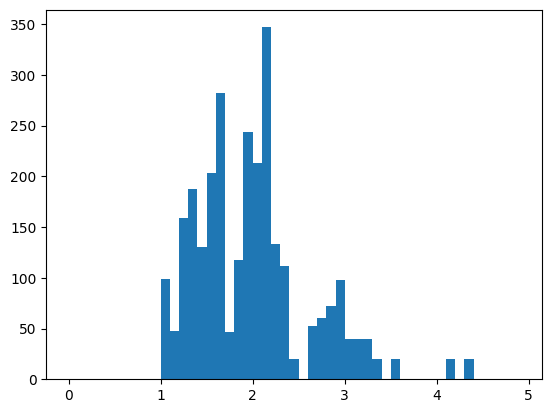

In [17]:
plt.hist(durations_test, bins=np.arange(0, 5, 0.1))
plt.show()


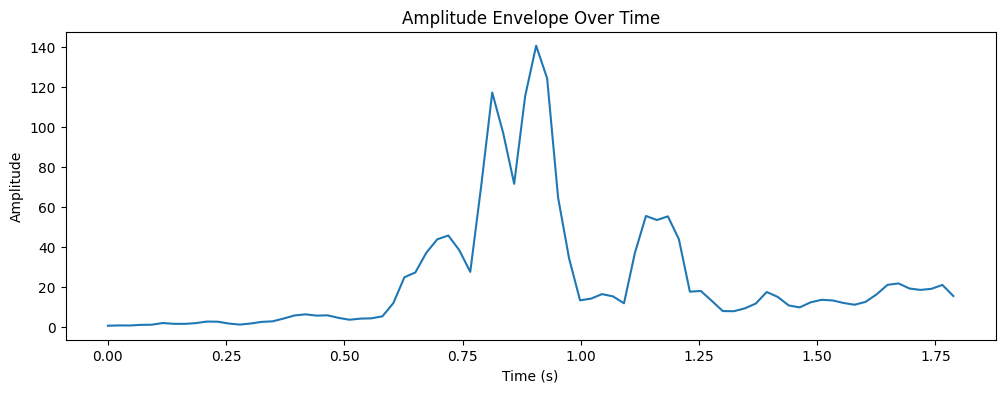

In [154]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048  # Typical value, adjust based on your needs
hop_length = 512  # Typical value, 1/4 of n_fft

# Load audio
y, sr = librosa.load("audio_files_merged/id_ycmfxz1tgd.wav")
def get_amplitude_envelope(y, sr):
    # Compute STFT and get amplitude
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    amplitude_spectrum = np.abs(S)

    # Compute the amplitude envelope over time
    amplitude_envelope = np.max(amplitude_spectrum, axis=0)

    return amplitude_envelope

amplitude_envelope = get_amplitude_envelope(y, sr)

def plot_amplitude_envelope(amplitude_envelope, sr):
    # Create a time array for plotting
    time = np.arange(len(amplitude_envelope)) * hop_length / sr

    # Plot amplitude against time
    plt.figure(figsize=(12, 4))
    plt.plot(time, amplitude_envelope)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Envelope Over Time')
    plt.show()

plot_amplitude_envelope(amplitude_envelope, sr)

In [133]:
amplitude_envelope.mean()

19.774944

In [180]:
import torchaudio
waveform, sr = librosa.load("audio_files_merged/id_ycmfxz1tgd.wav")
waveform = torch.from_numpy(waveform).unsqueeze(0)
# Convert to mono if stereo
if waveform.size(1) > 1:
    print(waveform.size)
    waveform = torch.mean(waveform, dim=0, keepdim=True)

mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=16000,
            n_fft=2048,
            hop_length=512,
            n_mels=128
        )
print(waveform.shape)
mel_spec = mel_transform((waveform))
print(mel_spec.shape)

<built-in method size of Tensor object at 0x332cc4dd0>
torch.Size([1, 39514])
torch.Size([1, 128, 78])


ValueError: For X (129) and Y (2) with flat shading, A should have shape (1, 128, 3) or (1, 128, 4) or (1, 128) or (128,), not (1, 128, 78)

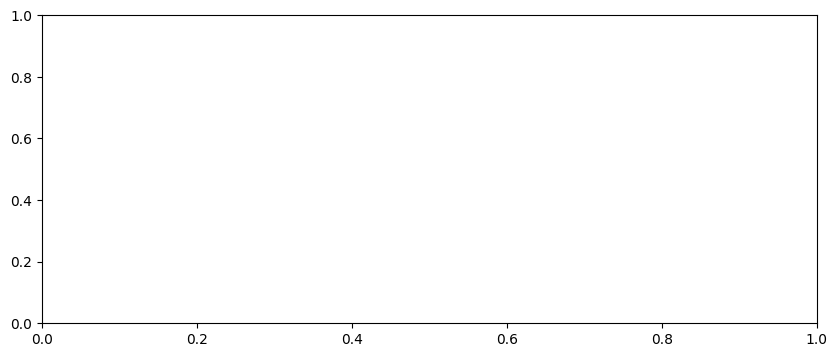

In [182]:
# Display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec.numpy(), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


(171219,)


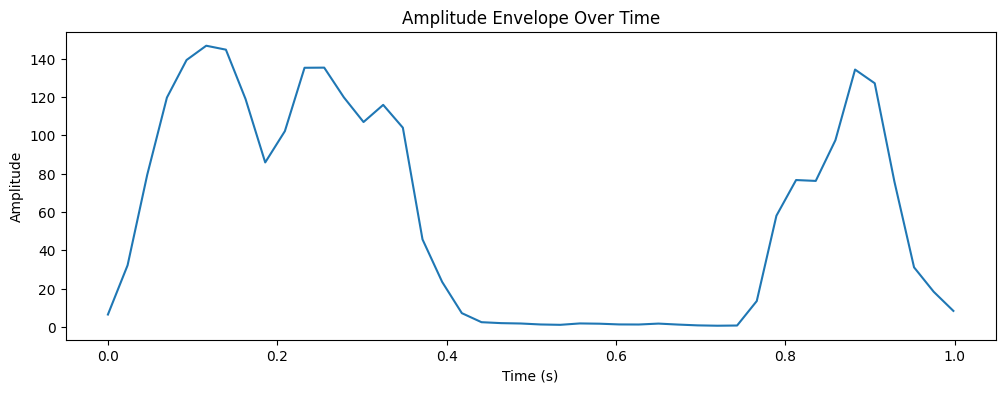

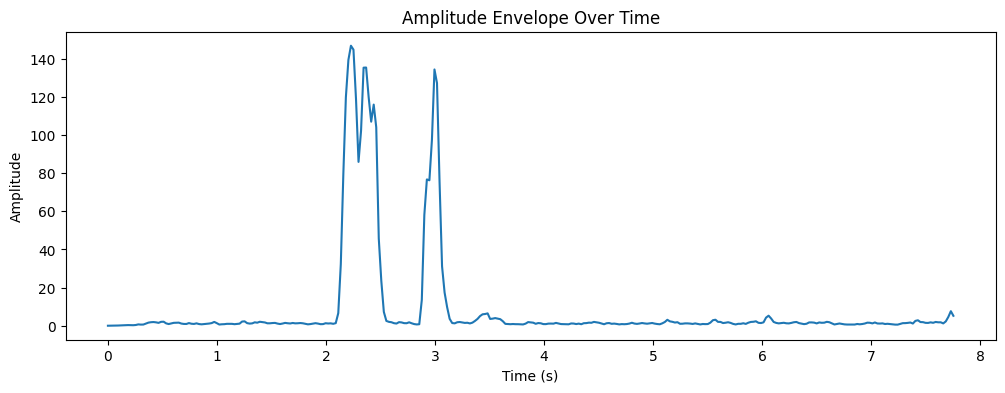

8.755239
[46592 68608]
(22016,)


In [246]:
import torchaudio
# amplitude_spectrum
# ipd.Audio(S, rate=sr)  # Using first channel if stereo
y, sr = librosa.load("audio_files_merged/id_6zszv1h7ev.wav")

print(y.shape)
# y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)
# print(y_resampled.shape)
trimmed_waveform, trim_indexes = librosa.effects.trim(
    y,
    top_db=15,
    frame_length=2048,
    hop_length=hop_length
)
amplitude_envelope = get_amplitude_envelope(trimmed_waveform, sr)
plot_amplitude_envelope(amplitude_envelope, sr)
amplitude_envelope = get_amplitude_envelope(y, sr)
plot_amplitude_envelope(amplitude_envelope, sr)
print(amplitude_envelope.mean())
print(trim_indexes)
print(trimmed_waveform.shape)
ipd.Audio(y, rate=sr)
ipd.Audio(trimmed_waveform, rate=sr)


88425.0613048369 21091.73532238256
47923.95950506187 539.2362871583119
1.8443749403773508 0.4368196598113251


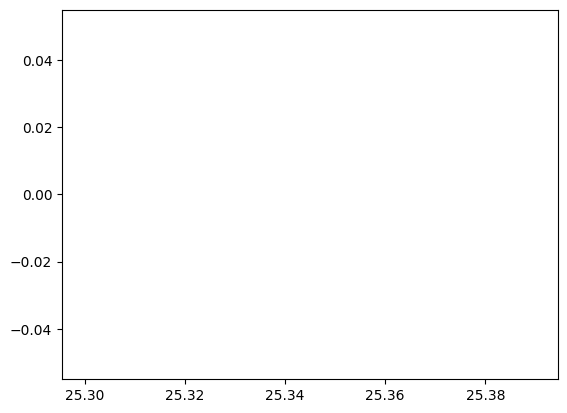

In [143]:
amplitude_envelope_means = []
for idx, fpath in enumerate(images):
    fs, data = sw.read(os.path.join(img_root, fpath))

    trimmed_waveform, trim_indexes = librosa.effects.trim(
        y,
        top_db=20,
        frame_length=2048,
        hop_length=hop_length
    )
    amplitude_envelope = get_amplitude_envelope(trimmed_waveform, sr)
    amplitude_envelope_means.append(amplitude_envelope.mean())

    lengths.append(data.shape[0])
    all_fs.append(fs)
    durations.append(data.shape[0]/fs)
    if durations[-1] > 4:
        print(fpath, durations[-1])
print(np.mean(lengths), np.std(lengths))
print(np.mean(all_fs), np.std(all_fs))
print(np.mean(durations), np.std(durations))

plt.hist(amplitude_envelope_means)
plt.show()


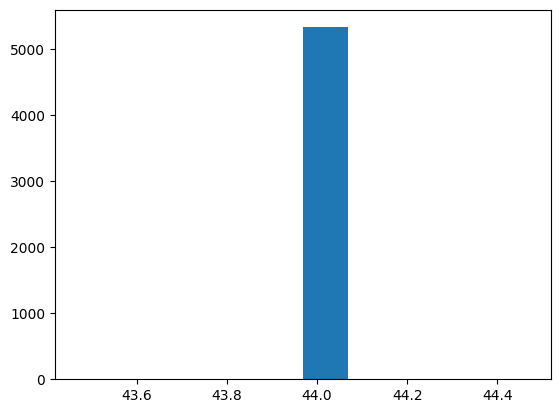

43.96859

In [144]:
plt.hist(amplitude_envelope_means)
plt.show()
np.min(amplitude_envelope_means)


In [145]:
np.min(amplitude_envelope_means)

43.96859

In [39]:
from train_vae import AudioDataset
from torch.utils.data import DataLoader
import torch.nn as nn
class VAE(nn.Module):
    def __init__(self, latent_dim=32):
        super(VAE, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1), 
            nn.Dropout(0.2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.Dropout(0.2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 16),
        )
        
        # Calculate flattened size (depends on input size)
        # self.flatten_size = 128 * 16 * 16  # This needs to match your input size
        self.flatten_size = 16
        
        # Latent space
        self.fc_mu = nn.Linear(self.flatten_size, latent_dim)
        self.fc_var = nn.Linear(self.flatten_size, latent_dim)
        
        # Decoder
        self.decoder_input = nn.Linear(latent_dim, self.flatten_size)
        
        self.decoder = nn.Sequential(
            nn.Linear(16, 128),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(128, 128 * 8 * 8),
            nn.BatchNorm1d(128 * 8 * 8),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(128),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
        
    def encode(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        log_var = self.fc_var(x)
        return mu, log_var
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        x = self.decoder_input(z)
        x = self.decoder(x)
        return x
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

model = VAE(latent_dim=2)
checkpoint = torch.load('./runs/2024-11-27_00-38-23/vae_checkpoint_epoch_100.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()



/var/folders/n9/70cv_1zs1w725hxmfvjbvl1h0000gn/T/ipykernel_90261/3890970541.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('./runs/2024-11-27_0

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): Dropout(p=0.2, inplace=False)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): Dropout(p=0.2, inplace=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): Dropout(p=0.2, inplace=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (13): Dropout(p=0.2, inplace=False)
    (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): Flatten(start_dim=1, end_dim=-1)
    (17): Linear(in_features=8192, out_fe

In [40]:
dataset = AudioDataset("test_data")
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

epoch_latent_vectors = []
for data, _ in dataloader:
    mu, log_var = model.encode(data)
    epoch_latent_vectors.append(mu)

epoch_latent_vectors = torch.cat(epoch_latent_vectors, dim=0)



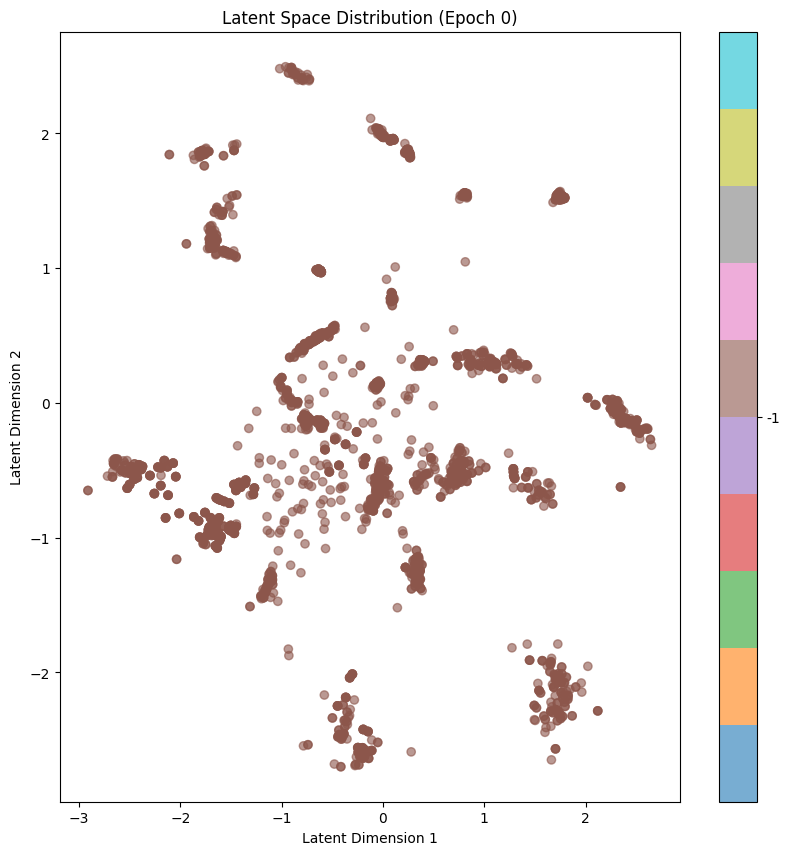

In [41]:
from sklearn.manifold import TSNE  # for latent dims > 2


def plot_latent_space(epoch, latent_vectors, labels):
    plt.figure(figsize=(10, 10))
    
            # Convert string labels to numeric values
    unique_labels = sorted(set(labels))
    label_to_id = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = [label_to_id[label] for label in labels]

    if latent_vectors.shape[1] > 2:
        # If latent dimension > 2, use t-SNE to reduce to 2D
        tsne = TSNE(n_components=2, random_state=42)
        latent_2d = tsne.fit_transform(latent_vectors)
        x, y = latent_2d[:, 0], latent_2d[:, 1]
    else:
        # If latent dimension is 2, use directly
        x, y = latent_vectors[:, 0], latent_vectors[:, 1]
    
    # Create scatter plot with numeric labels
    scatter = plt.scatter(x, y, c=numeric_labels, cmap='tab10', alpha=0.6)
    
    # Add a colorbar with text labels
    cbar = plt.colorbar(scatter, ticks=range(len(unique_labels)))
    cbar.ax.set_yticklabels(unique_labels)
    
    plt.title(f'Latent Space Distribution (Epoch {epoch})')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    # plt.savefig(run_dir / f'latent_space_epoch_{epoch}.png')
    # plt.close()
    plt.show()

plot_latent_space(0, epoch_latent_vectors.detach().cpu().numpy(), dataset.labels)


In [42]:
fpath = os.path.join(img_root, images[0])
count = 0
count_1 = 0
for idx, fpath in enumerate(images):
    fs, data = sw.read(os.path.join(img_root, fpath))
    if data.ndim != 2 or data.shape[1] != 2:
        print(idx, fpath, data.shape)
        count_1 += 1
    else:
        if count%100 == 0:
            print(data[0].mean(), data[1].mean())
        count += 1
print(count, count_1)


In [44]:
import torch
import torchaudio
from torchaudio.transforms import Vad


# Load the audio file
fpath = "id_cb0uny38ny.wav"
waveform, sample_rate = torchaudio.load(os.path.join(img_root, fpath), normalize=False)
print(waveform.float().mean())


waveform, sample_rate = torchaudio.load(os.path.join(img_root, fpath))
print(waveform.mean())

# Apply VAD to trim silence from the beginning and end
vad = Vad(sample_rate)
waveform = vad(waveform)

print(waveform.shape, waveform.min(), waveform.max(), waveform.mean())
ipd.Audio(waveform, rate=sample_rate)  # Using first channel if stereo

tensor(-14.3209)
tensor(-0.0004)
torch.Size([2, 50784]) tensor(-0.2926) tensor(0.2654) tensor(-0.0006)


In [9]:
waveform_reversed = torch.flip(waveform, [1])
ipd.Audio(waveform_reversed, rate=sample_rate)

In [10]:
resampler = torchaudio.transforms.Resample(100000, 100000)
waveform = resampler(waveform)
print(waveform.shape, waveform.min(), waveform.max(), waveform.mean())
ipd.Audio(waveform, rate=sample_rate)


torch.Size([2, 50784]) tensor(-0.2926) tensor(0.2654) tensor(-0.0006)


In [11]:
# Trim silence from the end by reversing, applying VAD, and reversing back
# waveform_reversed = torch.flip(waveform, [1])
waveform_reversed = vad(waveform)
print(waveform_reversed.shape, waveform_reversed.min(), waveform_reversed.max(), waveform_reversed.mean())
# waveform_reversed = torch.flip(waveform_reversed, [1])
ipd.Audio(waveform_reversed, rate=sample_rate)  # Using first channel if stereo

torch.Size([2, 36384]) tensor(-0.2926) tensor(0.2654) tensor(-0.0004)


In [12]:
# Check the number of channels
if waveform.shape[0] == 2:
    # Convert to mono by averaging the channels
    waveform = torch.mean(waveform, dim=0, keepdim=True)
print(waveform.shape, waveform.min(), waveform.max(), waveform.mean())
# Save the mono audio
torchaudio.save("mono_audio.wav", waveform, sample_rate)
ipd.Audio(waveform, rate=sample_rate)

torch.Size([1, 50784]) tensor(-0.2247) tensor(0.2426) tensor(-0.0006)


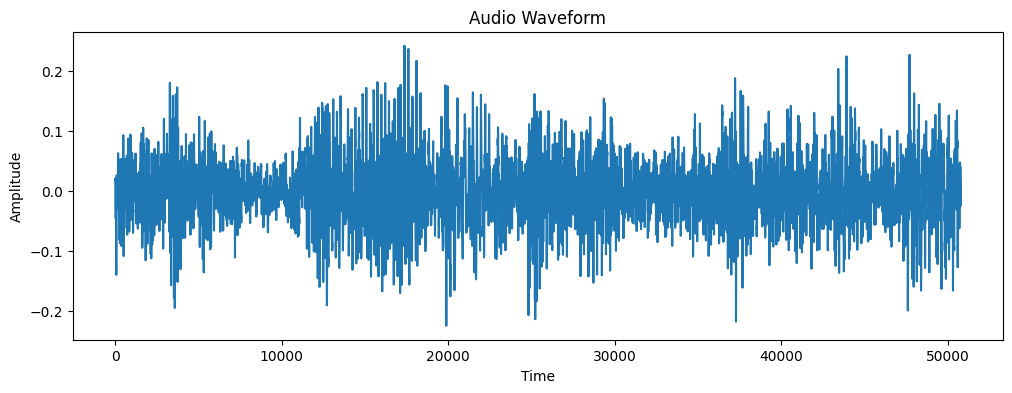

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(waveform.t().numpy())
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")
plt.show()

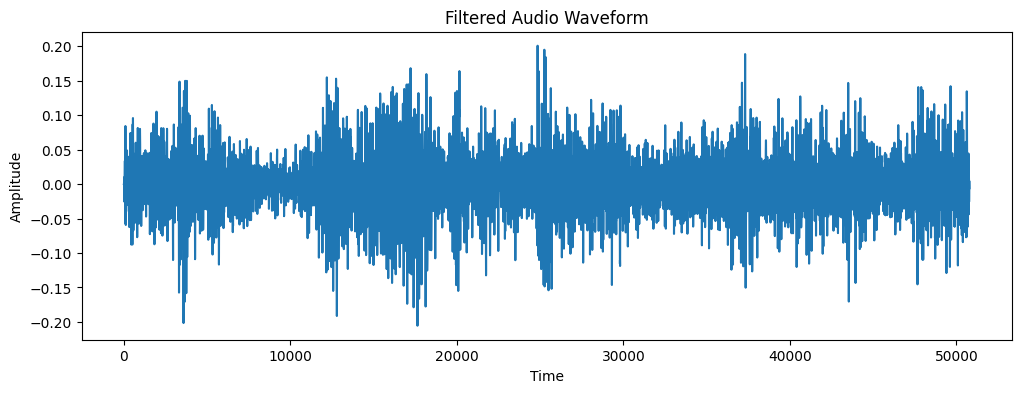

Original waveform shape: torch.Size([1, 50784])
Filtered waveform shape: torch.Size([1, 50784])


In [14]:
import numpy as np
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Apply bandpass filter to remove noise
lowcut = 300.0  # Lower frequency cutoff
highcut = 3000.0  # Upper frequency cutoff
fs = sample_rate  # Sampling rate

filtered_waveform = butter_bandpass_filter(waveform[0].numpy(), lowcut, highcut, fs)

# Convert back to torch tensor
filtered_waveform = torch.from_numpy(filtered_waveform).unsqueeze(0)

# Plot the filtered waveform
plt.figure(figsize=(12, 4))
plt.plot(filtered_waveform.t().numpy())
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Filtered Audio Waveform")
plt.show()

# Save the filtered audio
torchaudio.save("filtered_audio.wav", filtered_waveform, sample_rate, format='wav')

print("Original waveform shape:", waveform.shape)
print("Filtered waveform shape:", filtered_waveform.shape)
ipd.Audio(filtered_waveform[0].numpy(), rate=sample_rate)


In [15]:
from transforms import FFTransform

fft = FFTransform()
fft(waveform)

tensor([[-2.5682-0.0000j, -2.6617+0.5145j, -3.9569+0.9739j,  ...,
         -2.8796-0.6453j, -3.9569-0.9739j, -2.6617-0.5145j]])

48


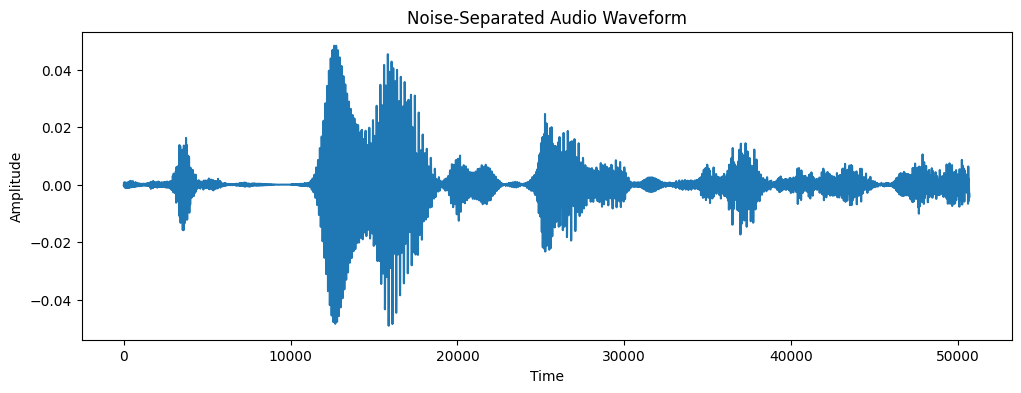

Original waveform shape: torch.Size([1, 50784])
Filtered waveform shape: torch.Size([1, 50784])
Separated waveform shape: torch.Size([1, 50688])


/var/folders/n9/70cv_1zs1w725hxmfvjbvl1h0000gn/T/ipykernel_10927/3766014145.py:66: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(waveform[0].numpy()), ref=np.max),
/var/folders/n9/70cv_1zs1w725hxmfvjbvl1h0000gn/T/ipykernel_10927/3766014145.py:70: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(filtered_waveform[0].numpy()), ref=np.max),
/var/folders/n9/70cv_1zs1w725hxmfvjbvl1h0000gn/T/ipykernel_10927/3766014145.py:74: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(l

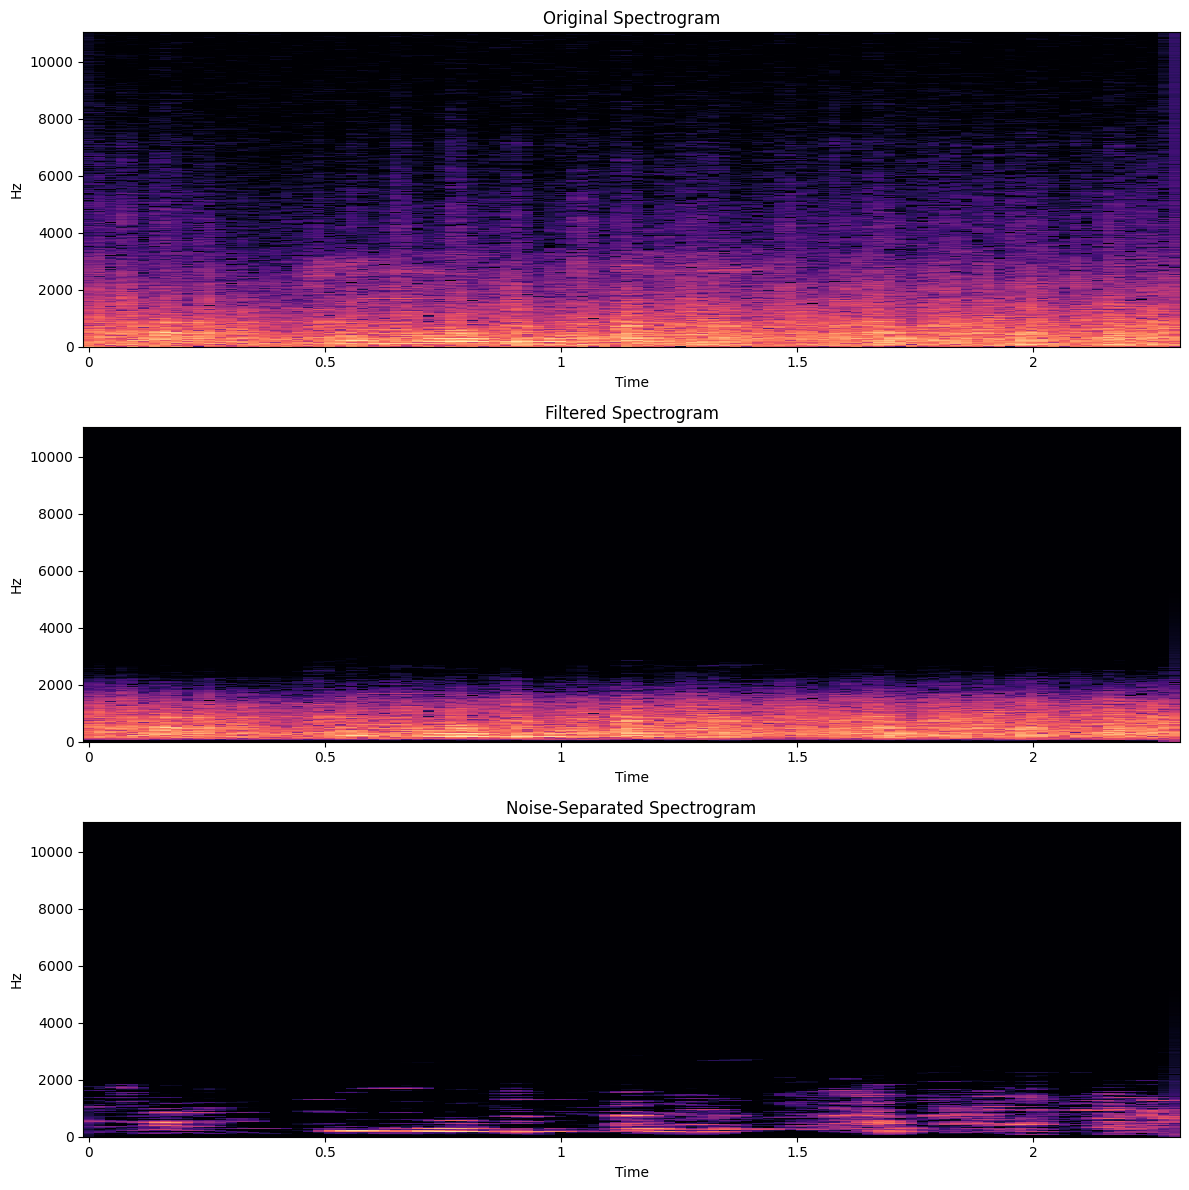

In [16]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def separate_noise(audio, sr):
    # Compute the spectrogram
    S_full, phase = librosa.magphase(librosa.stft(audio))
    
    # Compute the mean spectrum
    # Adjust the width parameter to be within the valid range
    max_width = min((S_full.shape[1] - 1) // 2, 52) - 1 # Ensure width is at most 52
    print(max_width)
    S_filter = librosa.decompose.nn_filter(S_full,
                                           aggregate=np.median,
                                           metric='cosine',
                                           width=max_width)
    
    # The output of the filter shouldn't be greater than the input
    S_filter = np.minimum(S_full, S_filter)
    
    # Compute the residual
    margin_i, margin_v = 2, 10
    power = 2
    
    mask_i = librosa.util.softmask(S_filter,
                                   margin_i * (S_full - S_filter),
                                   power=power)
    
    mask_v = librosa.util.softmask(S_full - S_filter,
                                   margin_v * S_filter,
                                   power=power)
    
    # Compute the foreground and background
    S_foreground = mask_v * S_full
    S_background = mask_i * S_full
    
    # Reconstruct the foreground audio
    y_foreground = librosa.istft(S_foreground * phase)
    
    return y_foreground

# Apply noise separation to the filtered waveform
separated_audio = separate_noise(filtered_waveform[0].numpy(), sample_rate)

# Convert back to torch tensor
separated_waveform = torch.from_numpy(separated_audio).unsqueeze(0)

# Plot the separated waveform
plt.figure(figsize=(12, 4))
plt.plot(separated_waveform.t().numpy())
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Noise-Separated Audio Waveform")
plt.show()

# Save the separated audio
torchaudio.save("separated_audio.wav", separated_waveform, sample_rate, format='wav')

print("Original waveform shape:", waveform.shape)
print("Filtered waveform shape:", filtered_waveform.shape)
print("Separated waveform shape:", separated_waveform.shape)

# Compare spectrograms
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(waveform[0].numpy()), ref=np.max),
                         y_axis='hz', x_axis='time', ax=axs[0])
axs[0].set_title('Original Spectrogram')

librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(filtered_waveform[0].numpy()), ref=np.max),
                         y_axis='hz', x_axis='time', ax=axs[1])
axs[1].set_title('Filtered Spectrogram')

librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(separated_audio), ref=np.max),
                         y_axis='hz', x_axis='time', ax=axs[2])
axs[2].set_title('Noise-Separated Spectrogram')

plt.tight_layout()
plt.show()
ipd.Audio(separated_audio, rate=sample_rate)

In [17]:
ipd.Audio(waveform, rate=sample_rate)

In [18]:
sample_rate

48000

In [19]:
# fft = np.fft.fft(waveform[0])
# fft_centered = np.fft.fftshift(fft)
# fft_magn = np.log10(np.abs(fft_centered)**2)
# ss.resample(fft_magn, 5000).astype(np.float32).shape

import torch
import torchaudio

# Create a sample waveform
# waveform = torch.randn(1, 16000)  # 1 channel, 16000 samples

# Define the original and target sample rates
orig_freq = 17000
new_freq = 6000

# Create the resampling transform
resample = torchaudio.transforms.Resample(new_freq*3, new_freq)

# Resample the waveform
resampled_waveform = resample(waveform)

print(resampled_waveform.shape)  # Should output torch.Size([1, 8000])
ipd.Audio(resampled_waveform, rate=sample_rate)

torch.Size([1, 16928])


In [20]:
from torch.utils.data import Dataset, DataLoader
from transforms import FFTransform, TrimSilence, STFTTransform, OneHot, collate_fn, Resample
from torchvision.transforms import Compose
import pickle
from sklearn.model_selection import train_test_split

# Load the training data
with open('./data/audio_data.pkl', 'rb') as f:
    audio_data = pickle.load(f)
training_data = audio_data['train_data']
training_labels = audio_data['train_labels']
training_file_ids = audio_data['train_file_ids']

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels, train_file_ids, val_file_ids = train_test_split(
    training_data, training_labels, training_file_ids, test_size=0.2, random_state=42
)

# Dataset and DataLoader
class MyDataset(Dataset):
    def __init__(self, audios, labels, file_ids, transform=None, target_transform=None):
        self.audios = audios
        self.labels = labels
        self.file_ids = file_ids
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        waveform = self.audios[idx]
        label = self.labels[idx]
        file_id = self.file_ids[idx]

        try:
            if self.transform:
                waveform = self.transform(waveform)
            if self.target_transform:
                label = self.target_transform(label)
        except Exception as e:
            print(f"{file_id} failed with error {e}")
            return self[idx+1] if idx+1 < len(self) else None

        return waveform, label

NUM_CLASSES = 8
SAMPLE_RATE = 48_000
CLASS_LABELS_MAP = {
    'down': 0,
    'go': 1,
    'left': 2,
    'no': 3,
    'right': 4,
    'stop': 5,
    'up': 6,
    'yes': 7
}
# Create training and validation datasets and dataloaders

data_transforms = Compose([TrimSilence(sample_rate=SAMPLE_RATE), FFTransform()])
train_dataset = MyDataset(train_data, train_labels, train_file_ids, transform=data_transforms, target_transform=OneHot(CLASS_LABELS_MAP))
val_dataset = MyDataset(val_data, val_labels, val_file_ids, transform=data_transforms, target_transform=OneHot(CLASS_LABELS_MAP))
dataloader_train = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=False, num_workers=0)
dataloader_val = DataLoader(val_dataset, batch_size=32, shuffle=False, pin_memory=False, num_workers=0)


FileNotFoundError: [Errno 2] No such file or directory: './data/audio_data.pkl'

In [5]:
import scipy.signal as ss
from IPython.display import Audio

waveform = train_dataset[20][0]
Audio(waveform, rate=SAMPLE_RATE)


In [10]:
import torch

torch.randn(1, 23998).shape

conv1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=1, out_channels=12, kernel_size=3),
            torch.nn.Conv1d(in_channels=12, out_channels=12, kernel_size=3, padding=1),
            torch.nn.MaxPool1d(kernel_size=2, stride=2, padding=1)
        )
pool = torch.nn.MaxPool1d(kernel_size=2, stride=2, padding=1)
pool(torch.randn(1, 12, 48000)).shape


torch.Size([1, 12, 24001])

In [11]:
output = torch.argmax(torch.randn(32, 12, 8), dim=1)
labels = torch.randint(32, 8)
output.shape


torch.Size([32, 8])

In [72]:
if not (os.path.exists('./training_data.npy') and os.path.exists('./training_labels.npy')):

    # import .wav data & labels
    img_root = "./TechCabal Ewe Audio Files/"
    csv_data = pd.read_csv('./Train.csv', sep=',')
    print(csv_data.keys())
    images = csv_data['audio_filepath']
    labels = csv_data['class']

    unique_labels = np.unique(labels)
    print(unique_labels)
    labels_class = np.arange(0,len(np.unique(labels)))
    print(labels_class)

    # create class to load data into DataLoader (and preprocess)
    freq_spectrum = []
    freq_labels = []
    for widx, wv in enumerate(images):
        fpath = os.path.join(img_root, wv)
        if os.path.isfile(fpath) == 1:
            fs, data = sw.read(fpath)
            class_tmp = labels[widx]
            cidx = np.where(class_tmp == unique_labels)[0]
            freq_labels.append(cidx)
            # convert time domain to frequency domain
            if len(data.shape) > 1:
                data = data[:,0]
            # transforming the 1-D time-series into a frequency spectrum
            fft = np.fft.fft(data)
            fft_centered = np.fft.fftshift(fft)
            fft_magn = np.log10(np.abs(fft_centered)**2)
            # print(fft_magn.shape)
            fft_magn_dwn = ss.resample(fft_magn, 51744, axis=0).astype(np.float32)
            freq_spectrum.append(fft_magn_dwn.T)

    freq_spectrum_arr = np.stack(freq_spectrum, axis=0)
    freq_labels_arr = np.array(freq_labels)

    imgs_length = [freq.shape[0] for freq in freq_spectrum_arr]
    print(np.min(imgs_length))      # 51744

    np.save('training_data.npy', freq_spectrum_arr)
    np.save('training_labels.npy', freq_labels_arr)

Index(['id', 'audio_filepath', 'duration', 'class'], dtype='object')
['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']
[0 1 2 3 4 5 6 7]
data.shape (95232,)


TypeError: flip(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [62]:
p = "id_oacj1nszqs.wav"
fpath = os.path.join(img_root, p)
fs, data = sw.read(fpath)
print(data.mean(), data.std())
fft = np.fft.fft(data)
print(fft.mean(), fft.std())
# fft_centered = np.fft.fftshift(fft)
# fft_magn = np.log10(np.abs(fft_centered)**2)


torch_waveform, torch_sample_rate = torchaudio.load(fpath, normalize=False)
torch_waveform = torch_waveform.T.float()
print(torch_waveform.mean(dtype=torch.float), torch_waveform.float().std())
fft = torch.fft.fft(torch_waveform)
print(fft.mean(), fft.std())



-6.997343154500147 2642.6342330022117
(-6.997343154500147+0j) 3737.2557233458883
tensor(-6.9973) tensor(2642.6404)
tensor(-6.9973+0.j) tensor(3737.2642)


In [35]:
# if not (os.path.exists('./training_data.npy') and os.path.exists('./training_labels.npy')):
from torchaudio.transforms import Vad

class TrimSilence2:
    def __init__(self, sample_rate: int, trigger_level: float = 7.0):
        self.sample_rate = sample_rate
        self.trigger_level = trigger_level

    def __call__(self, waveform: torch.Tensor) -> torch.Tensor:
        vad = Vad(sample_rate=self.sample_rate, trigger_level=self.trigger_level)

        # Reverse, trim silence from the end (which is now the beginning), and reverse back
        waveform_reversed = torch.flip(waveform, dims=[0])    
        
        # Trim silence from the beginning
        waveform_front_trim = vad(waveform_reversed)
        # print("Inside TrimSilence, waveform_front_trim.shape", waveform_front_trim.shape)
    
        waveform_reversed = torch.flip(waveform_front_trim, dims=[0]) if waveform_front_trim.shape[0] > 0 else waveform_reversed
        # return waveform_reversed
        waveform_end_trim = vad(waveform_reversed)
        
        return waveform_end_trim if waveform_end_trim.shape[0] > 0 else waveform

SAMPLE_RATE = 48_000
trim_silence = TrimSilence2(sample_rate=SAMPLE_RATE)
count = 5
# import .wav data & labels
img_root = "./TechCabal Ewe Audio Files/"
csv_data = pd.read_csv('./Train.csv', sep=',')
print(csv_data.keys())
images = csv_data['audio_filepath']
labels = csv_data['class']

unique_labels = np.unique(labels)
print(unique_labels)
labels_class = np.arange(0,len(np.unique(labels)))
print(labels_class)

# create class to load data into DataLoader (and preprocess)
freq_spectrum = []
freq_labels = []
c = 0
for widx, wv in enumerate(images):
    fpath = os.path.join(img_root, wv)
    if os.path.isfile(fpath) == 1:
        data, sample_rate = torchaudio.load(fpath, normalize=False)
        print(data.float().mean())
        data, sample_rate = torchaudio.load(fpath, normalize=True)
        print(data.mean())
        print("sample_rate", sample_rate)
        data = data.T.float()
        class_tmp = labels[widx]
        cidx = np.where(class_tmp == unique_labels)[0]
        freq_labels.append(cidx)
        # convert time domain to frequency domain
        if len(data.shape) > 1:
            data = data[:,0]
        print("data.shape", data.shape)
        trimmed_data = trim_silence(data)
        print("trimmed_data.shape", trimmed_data.shape)
        c += 1
        if c > count:
            break
        continue

Index(['id', 'audio_filepath', 'duration', 'class'], dtype='object')
['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']
[0 1 2 3 4 5 6 7]
tensor(516.4148)
tensor(0.0158)
sample_rate 48000
data.shape torch.Size([95232])
trimmed_data.shape torch.Size([66432])
tensor(-47.8351)
tensor(-0.0015)
sample_rate 48000
data.shape torch.Size([97296])
trimmed_data.shape torch.Size([61296])
tensor(-2.2081)
tensor(-6.7386e-05)
sample_rate 48000
data.shape torch.Size([109152])
trimmed_data.shape torch.Size([80352])
tensor(-8.6144)
tensor(-0.0003)
sample_rate 48000
data.shape torch.Size([104448])
trimmed_data.shape torch.Size([61248])
tensor(-2.9568)
tensor(-9.0235e-05)
sample_rate 48000
data.shape torch.Size([78432])
trimmed_data.shape torch.Size([47232])
tensor(-5009.5430)
tensor(-0.1529)
sample_rate 48000
data.shape torch.Size([99552])
trimmed_data.shape torch.Size([68352])


In [49]:
from torchvision.transforms import Normalize
normalize = Normalize(mean=[4], std=[5])

test_tensor = torch.stack([data, data]).unsqueeze(1)
print(test_tensor.shape, test_tensor.mean())
test_tensor_norm = normalize(test_tensor)
print(test_tensor_norm.shape, test_tensor_norm.mean())

torch.Size([2, 1, 99552]) tensor(-0.1529)
torch.Size([2, 1, 99552]) tensor(-0.8306)


In [51]:
test_tensor, test_tensor_norm

(tensor([[[ 0.0344,  0.0351,  0.0253,  ..., -0.2708, -0.2672, -0.2587]],
 
         [[ 0.0344,  0.0351,  0.0253,  ..., -0.2708, -0.2672, -0.2587]]]),
 tensor([[[-0.7931, -0.7930, -0.7949,  ..., -0.8542, -0.8534, -0.8517]],
 
         [[-0.7931, -0.7930, -0.7949,  ..., -0.8542, -0.8534, -0.8517]]]))

(5334, 51744)


/Users/ridwan/miniconda3/envs/cs8850env/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5334.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Statistic: 0.9727838495949506
P-value: 1.072941329532127e-30
0.0 1.0


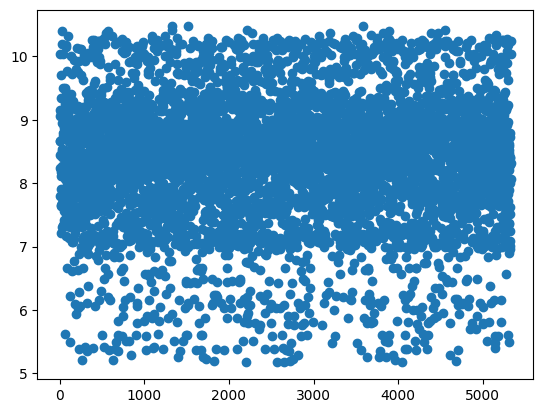

In [41]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import scipy.stats as stat

# load the training data arrays
training_data = np.load('./training_data.npy', allow_pickle=True)
training_labels = np.load('./training_labels.npy', allow_pickle=True)

print(training_data.shape)      # 799, 51744

# visualize data (means)
fig = plt.figure()
plt.scatter(np.arange(0,training_data.shape[0]), np.mean(training_data, axis=1), )

# Perform the Shapiro-Wilk test ---> test for normality
statistic, p_value = stat.shapiro(np.mean(training_data, axis=1))
print("Shapiro-Wilk Statistic:", statistic)
print("P-value:", p_value)

# note: according to Shapiro-Wilk test, data is significantly skewed
# thus, when data is non-normal/non-Gaussian, normalization is preferred [for unknown distribution]
# normalize data range = 0 -> 1
training_data = (training_data - np.min(training_data)) / (np.max(training_data) - np.min(training_data))
print(np.min(training_data), np.max(training_data))

# one-hot encode labels
training_labels_tmp = torch.tensor(training_labels.flatten())
training_labels = nn.functional.one_hot(training_labels_tmp)

class MyDataset(Dataset):
    def __init__(self):
        self.imgs = training_data
        self.labels = training_labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.labels[idx]
        return image, label

dataset = MyDataset()
dataloader_train = DataLoader(dataset,
                              batch_size=64,
                              shuffle=True,
                            #   num_workers=0,
                              pin_memory=False)

print(dataloader_train)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


tensor([[ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5]])

In [42]:
import torch.nn as nn
import torch.optim as optim

# Define your CNN model
class MyCNN(nn.Module):
    def __init__(self, n_classes):
        super(MyCNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3),
            nn.Conv1d(in_channels=32, out_channels=75, kernel_size=3),
            nn.MaxPool1d(kernel_size = 2, stride = 2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv1d(in_channels=75, out_channels=100, kernel_size=3),
            nn.Conv1d(in_channels=100, out_channels=75, kernel_size=3),
            nn.Conv1d(in_channels=75, out_channels=32, kernel_size=3),
            nn.Conv1d(in_channels=32, out_channels=1, kernel_size=3),
            nn.MaxPool1d(kernel_size = 2, stride = 2),
        )
        self.adaptive_pool = nn.AdaptiveAvgPool1d(199)

        self.fc_layers = nn.Sequential(
            nn.Linear(199, 199),
            nn.ReLU(),
            nn.Linear(225, 475),
            nn.ReLU(),
            nn.Linear(475, 210),
            nn.ReLU(),
            nn.Linear(210, 100),
            nn.ReLU(),
            nn.Linear(199, 25),
            nn.LeakyReLU(),
            nn.Linear(25, n_classes)
        )     

    def forward(self, x):
        x = torch.unsqueeze(x, axis=0)
        x = torch.permute(x, (1,0,2))
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        # x = self.conv2(x)
        # print(x.shape)
        x = self.adaptive_pool(x)
        print(x.shape)
        x = self.fc_layers(x)
        return x
    
# set weight initialization
def init_weights(model):
    """Set Conv weights to be He initialization (Kaiming uniform distr) for all Convs
        bound = gain x sqrt(3 / fan_mode), 
        where final tensor has bounds (-bound, +bound) from a uniform distri.
        gain (multiplicative factor adjusting weights prior to feeding into neurons), that
        has influence on the weight magnitudes, by preserving weight magnitudes in backwards pass (fan_out: n = number of inputs to node)
        **** He = recommended for use with ReLU ****
    
        Linear layer weights are truncated normal distribution
        mean = 0, std = 1, with all values within bounds a <= u <= b
    """
    for m in model.modules():
        if isinstance(m, (nn.Conv1d)):
            nn.init.kaiming_uniform_(m.weight, mode='fan_out', nonlinearity='relu') 
            nn.init.constant_(m.bias, 0.0)
        if isinstance(m, (nn.Linear)):
            nn.init.trunc_normal_(m.weight, mean=0.0, std=1.0, a=-2.0, b=2.0, generator=None)
    
model = MyCNN(n_classes=8)
print(model.eval())

MyCNN(
  (conv1): Sequential(
    (0): Conv1d(1, 32, kernel_size=(3,), stride=(1,))
    (1): Conv1d(32, 75, kernel_size=(3,), stride=(1,))
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv1d(75, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(100, 75, kernel_size=(3,), stride=(1,))
    (2): Conv1d(75, 32, kernel_size=(3,), stride=(1,))
    (3): Conv1d(32, 1, kernel_size=(3,), stride=(1,))
    (4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (adaptive_pool): AdaptiveAvgPool1d(output_size=199)
  (fc_layers): Sequential(
    (0): Linear(in_features=199, out_features=199, bias=True)
    (1): ReLU()
    (2): Linear(in_features=225, out_features=475, bias=True)
    (3): ReLU()
    (4): Linear(in_features=475, out_features=210, bias=True)
    (5): ReLU()
    (6): Linear(in_features=210, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=199, out_features=25

In [43]:
import time

# Instantiate model, loss, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
# Training loop
epochs = 100
for epoch in range(epochs):
    begin_time = time.time()
    for i, data in enumerate(dataloader_train):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        outputs = torch.squeeze(outputs)
        outputs = outputs.float()
        labels = labels.float()
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # assess accuracy
        softmax_func = nn.Softmax(dim=1)
        softmax = softmax_func(outputs)
        acc_vector = (torch.argmax(softmax, dim=2) == torch.argmax(labels, dim=1))
        accuracy = acc_vector.float().mean()


        # Print progress
        print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(dataloader_train)}], Time: {time.time() - begin_time:.2f}, \
              Loss: {loss.item():.4f}, Accuracy: {accuracy}")
        
        begin_time = time.time()

torch.Size([64, 1, 51744])
torch.Size([64, 75, 25870])
torch.Size([64, 75, 199])


RuntimeError: linear(): input and weight.T shapes cannot be multiplied (75x199 and 225x475)

In [26]:
softmax.argmax(dim=2).shape

torch.Size([64, 75])

In [27]:
inputs.shape

torch.Size([64, 51744])

In [108]:
train_df = pd.read_csv('./Train.csv', sep=',')
labels = train_df['class']
unique_labels = np.unique(labels)
print(unique_labels)

test_df = pd.read_csv('./Test_1.csv', sep=',')



['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


In [109]:
train_df['class'].value_counts()

class
go       759
down     665
stop     655
left     651
right    651
up       651
yes      651
no       651
Name: count, dtype: int64

In [110]:
# Sample 8 records from training and test data
subset = train_df.sample(8)
subset_test = test_df.sample(8)

subset['class'].value_counts()
# subset_test['class'].value_counts()

class
go       4
right    1
no       1
down     1
left     1
Name: count, dtype: int64

In [111]:
unique_labels

array(['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes'],
      dtype=object)

In [112]:
id_to_label_map = {idx: label for idx, label in enumerate(unique_labels)}
label_to_id_map = {label: idx for idx, label in id_to_label_map.items()}
subset_labels = [label_to_id_map[label] for label in subset['class']]
subset_labels, label_to_id_map

([1, 4, 3, 0, 1, 1, 2, 1],
 {'down': 0,
  'go': 1,
  'left': 2,
  'no': 3,
  'right': 4,
  'stop': 5,
  'up': 6,
  'yes': 7})

In [120]:
audio_root = "./TechCabal Ewe Audio Files/"

def prepare_file(fpath: str):
    if os.path.isfile(fpath) == 1:
        fs, data = sw.read(fpath)
        
        
        
        # convert time domain to frequency domain
        if len(data.shape) > 1:
            data = data.mean(axis=1)
        # transforming the 1-D time-series into a frequency spectrum
        fft = np.fft.fft(data)
        fft_centered = np.fft.fftshift(fft)
        fft_magn = np.log10(np.abs(fft_centered)**2)
        # print(fft_magn.shape)
        fft_magn_dwn = ss.resample(fft_magn, 51744, axis=0).astype(np.float32)

        return fft_magn_dwn.T

subset_freq_spectrum = [prepare_file(os.path.join(audio_root, fpath)) for fpath in subset['audio_filepath']]
subset_test_freq_spectrum = [prepare_file(os.path.join(audio_root, fpath)) for fpath in subset_test['audio_filepath']]

# normalize data with min-max scaling
subset_freq_spectrum = (np.array(subset_freq_spectrum) - np.min(subset_freq_spectrum)) / (np.max(subset_freq_spectrum) - np.min(subset_freq_spectrum))
subset_test_freq_spectrum = (np.array(subset_test_freq_spectrum) - np.min(subset_test_freq_spectrum)) / (np.max(subset_test_freq_spectrum) - np.min(subset_test_freq_spectrum))


tensor(8.4944)


In [121]:
from archs.base import init_weights
best_model = init_weights(n_classes=8)
best_model.load_state_dict(torch.load('best_model.pth'))
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
best_model.to(device)
best_model.eval()

predictions = best_model(torch.tensor(subset_test_freq_spectrum).to(device))
predictions

/var/folders/n9/70cv_1zs1w725hxmfvjbvl1h0000gn/T/ipykernel_10927/701106112.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('best_mo

tensor([[ 20.8714,   9.5814,   6.7829,   9.3468, -15.4806,  -1.1784, -15.0532,
         -11.2777],
        [  3.5940,  -8.4213,   7.4327,  -9.4971,  -3.5796,  -7.6576,  19.1455,
           2.0370],
        [ 18.9701,  -1.2538,   2.9644,   8.0697, -15.7542,  -5.4133,  -6.5954,
         -14.4744],
        [ -4.7802,   2.0991,  14.2790, -17.4953,  -2.0905,  -1.2367,   5.0297,
         -10.6268],
        [ 21.8132,  12.8382,   5.8269,   7.7868, -22.4295,  -5.0426,  -2.7264,
         -17.3414],
        [ -7.2359,  13.1256, -15.4202,   8.8869, -11.6800,   3.7243,   3.8001,
          32.8660],
        [ 15.3116,  28.5434,   2.6324,   3.2649,  -9.5976,  -1.3514,  -3.4333,
          -4.4000],
        [ -1.1450,  -6.3970,   8.0519,  11.5770,  -5.3124,  -7.5609,  -0.1938,
          -9.7328]], device='mps:0', grad_fn=<LinearBackward0>)

In [122]:
import torch.nn as nn
torch.argmax(predictions, dim=1)


tensor([0, 6, 0, 2, 0, 7, 1, 3], device='mps:0')

In [93]:
from pathlib import Path
from torch.utils.data import Dataset
import librosa

class AudioDataset(Dataset):
    def __init__(self, data_dir, sample_rate=16000, duration=2):
        self.data_dir = Path(data_dir)
        self.sample_rate = sample_rate
        self.duration = duration
        self.num_samples = int(sample_rate * duration)
        self.target_size = (128, 128)  # Fixed size for mel spectrograms
        self.top_db = 15  # Threshold for silence detection
        
        # Get all audio files
        self.files = []
        self.labels = []
        self.file_ids = []
        for class_idx, class_dir in enumerate(sorted(os.listdir(data_dir))):
            class_path = self.data_dir / class_dir
            if class_path.is_dir():
                for file in class_path.glob('*.wav'):
                    self.files.append(file)
                    self.labels.append(class_path.name)
                    self.file_ids.append(file.stem)
            elif class_path.is_file() and class_path.suffix == '.wav':
                self.files.append(class_path)
                self.labels.append(-1)
                self.file_ids.append(class_path.stem)
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        audio_path = self.files[idx]
        # Load and preprocess audio
        waveform, sr = torchaudio.load(audio_path)
        
        # Convert to mono if stereo
        if waveform.shape[0] > 1:
            waveform = torch.mean(waveform, dim=0, keepdim=True)
        
        # Resample if necessary
        if sr != self.sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.sample_rate)
            waveform = resampler(waveform)
        
        # Convert to numpy for librosa processing
        waveform_np = waveform.numpy().squeeze()
        
        # Trim silence from both ends
        trimmed_waveform, trim_indexes = librosa.effects.trim(
            waveform_np,
            top_db=self.top_db,
            frame_length=2048,
            hop_length=512
        )
        
        # Convert back to torch tensor
        waveform = torch.from_numpy(trimmed_waveform).unsqueeze(0)
        
        # Ensure minimum length (pad if necessary)
        min_samples = int(self.sample_rate * self.duration)
        if waveform.size(1) < min_samples:
            waveform = torch.nn.functional.pad(
                waveform, 
                (0, min_samples - waveform.size(1))
            )
        
        # If longer than duration, take a random segment
        if waveform.size(1) > min_samples:
            max_start = waveform.size(1) - min_samples
            start = torch.randint(0, max_start, (1,))
            waveform = waveform[:, start:start + min_samples]

        # 3. Apply STFT for time-frequency representation
        stft = torch.stft(waveform, n_fft=2048, hop_length=512, win_length=2048, window=torch.hann_window(2048).to(device), center=True, pad_mode='reflect', normalized=False, onesided=True, return_complex=False)
        print(stft.shape)
                
        return waveform, self.labels[idx]



In [202]:
# ... existing imports ...
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset
from pathlib import Path

class AudioDatasetXGB(Dataset):
    def __init__(self, data_dir, sample_rate=16000, duration=2):
        super().__init__()
        self.data_dir = Path(data_dir)
        self.sample_rate = sample_rate
        self.duration = duration
        self.num_samples = int(sample_rate * duration)
        self.top_db = 15
        
        # Initialize label encoder
        self.label_encoder = LabelEncoder()
        
        # Get all audio files
        self.files = []
        self.labels = []
        self.file_ids = []
        self.read_files()

        # Encode labels
        self.labels = self.label_encoder.fit_transform(self.labels)

    def read_files(self):
        for class_idx, class_dir in enumerate(sorted(os.listdir(self.data_dir))):
            class_path = self.data_dir / class_dir
            if class_path.is_dir():
                for file in class_path.glob('*.wav'):
                    self.files.append(file)
                    self.labels.append(class_path.name)
                    self.file_ids.append(file.stem)
    
    def extract_features(self, waveform):
        """Extract relevant features from audio for XGBoost"""
        # Convert to numpy
        if isinstance(waveform, torch.Tensor):
            waveform = waveform.numpy()
        
        # Extract various audio features
        features = []
        
        # Time domain features
        features.extend([
            np.mean(waveform),
            np.std(waveform),
            np.max(waveform),
            np.min(waveform),
            np.median(waveform),
        ])

        # Convert to numpy for librosa processing
        waveform_np = waveform.squeeze()
        
        # Trim silence from both ends
        trimmed_waveform, trim_indexes = librosa.effects.trim(
            waveform_np,
            top_db=self.top_db,
            frame_length=2048,
            hop_length=512
        )
        
        # Convert back to torch tensor
        waveform = trimmed_waveform.reshape(1, -1)
        
        # Frequency domain features
        stft = librosa.stft(waveform.squeeze())
        mag_spec = np.abs(stft)
        
        # Mel spectrogram features
        mel_spec = librosa.feature.melspectrogram(y=waveform.squeeze(), sr=self.sample_rate)
        features.extend([
            np.mean(mel_spec),
            np.std(mel_spec),
            np.max(mel_spec),
        ])
        
        # MFCC features
        mfccs = librosa.feature.mfcc(y=waveform.squeeze(), sr=self.sample_rate, n_mfcc=13)
        features.extend(np.mean(mfccs, axis=1))
        
        # Spectral features
        spectral_centroids = librosa.feature.spectral_centroid(y=waveform.squeeze(), sr=self.sample_rate)
        features.extend([
            np.mean(spectral_centroids),
            np.std(spectral_centroids),
        ])
        
        return np.array(features)
    
    def prepare_dataset(self):
        """Prepare entire dataset for XGBoost training"""
        X = []
        y = []
        
        for idx in range(len(self.files)):
            # Load and preprocess audio
            waveform, sr = torchaudio.load(self.files[idx])
            
            # Convert to mono if stereo
            if waveform.shape[0] > 1:
                waveform = torch.mean(waveform, dim=0, keepdim=True)
            
            # Extract features
            features = self.extract_features(waveform)
            X.append(features)
            y.append(self.labels[idx])
        
        return np.array(X), np.array(y)

# Training function
def train_xgboost(data_dir, num_boost_round=100):
    # Create dataset
    dataset = AudioDatasetXGB(data_dir)
    X, y = dataset.prepare_dataset()
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 
    
    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Set XGBoost parameters
    params = {
        'objective': 'multi:softmax',
        'num_class': len(dataset.label_encoder.classes_),
        'max_depth': 6,
        'eta': 0.3,
        'eval_metric': 'mlogloss'
    }
    
    # Train model
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, 'train'), (dtest, 'test')],
        early_stopping_rounds=10,
        verbose_eval=10
    )
    
    # Make predictions
    y_pred = model.predict(dtest)
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    return model, dataset.label_encoder

# Usage
if __name__ == "__main__":
    model, label_encoder = train_xgboost("./train_data/")

[0]	train-mlogloss:1.56438	test-mlogloss:1.58709
[10]	train-mlogloss:0.42946	test-mlogloss:0.55118
[20]	train-mlogloss:0.18775	test-mlogloss:0.30097
[30]	train-mlogloss:0.09134	test-mlogloss:0.18195
[40]	train-mlogloss:0.05170	test-mlogloss:0.12787
[50]	train-mlogloss:0.02941	test-mlogloss:0.09540
[60]	train-mlogloss:0.01943	test-mlogloss:0.08204
[70]	train-mlogloss:0.01361	test-mlogloss:0.07470
[80]	train-mlogloss:0.01036	test-mlogloss:0.07194
[90]	train-mlogloss:0.00844	test-mlogloss:0.06947
[99]	train-mlogloss:0.00732	test-mlogloss:0.06855
Test Accuracy: 0.9859


In [203]:
class AudioDatasetXGBTest(AudioDatasetXGB):
    def __init__(self, data_dir, sample_rate=16000, duration=2):
        super().__init__(data_dir, sample_rate, duration)
    
    def read_files(self):
        self.test_df = pd.read_csv('./Test_1.csv', sep=',')
        for idx in range(len(self.test_df)):
            self.files.append(os.path.join(self.data_dir, self.test_df.iloc[idx]['audio_filepath']))
            self.labels.append(-1)
            self.file_ids.append(self.test_df.iloc[idx]['id'])

test_dataset = AudioDatasetXGBTest('./test_data/')
test_data, test_labels = test_dataset.prepare_dataset()
test_data.shape

(2946, 23)

In [204]:
predictions = model.predict(xgb.DMatrix(test_data))
predictions.astype(int)


array([0, 7, 5, ..., 2, 4, 6])

In [205]:
predictions_str = label_encoder.inverse_transform(predictions.astype(int))


In [206]:
print(f"Predictions shape: {predictions_str.shape}, file_ids shape: {len(test_dataset.file_ids)}")
test_df = pd.DataFrame({
    'id': test_dataset.file_ids, 
    'class': predictions_str
})

# Save submission file
output_path = 'submission_xgboost_simple.csv'
test_df.to_csv(output_path, index=False)
print(f"Submission file saved to {output_path}")


Predictions shape: (2946,), file_ids shape: 2946
Submission file saved to submission_xgboost_simple.csv


In [236]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
# pool of non-square window
m = nn.MaxPool2d(4)
input = torch.randn(20, 16, 4, 4)
output = m(input)
output.shape

torch.Size([20, 16, 1, 1])

In [217]:
df = pd.read_csv("runs_simple/2024-12-01_20-17-47/submission.csv")
df.head()
labels = [p.name for p in sorted(Path("train_data").glob('*'))]
labels
df['class'] = df.apply(lambda row: labels[row['class']], axis=1)
df.head()
df.to_csv("runs_simple/2024-12-01_20-17-47/submission_with_labels.csv", index=False)


In [218]:
%%bash
mv ~/Downloads/submission* ensemble/

In [238]:
from collections import Counter
files = list(Path("ensemble").glob("*.csv"))
print(files)
dfs = [pd.read_csv(f) for f in files]
dfs[0].head()
# sort all dfs by id
dfs = [df.sort_values(by="id").reset_index(drop=True) for df in dfs]
classes = [df['class'].tolist() for df in dfs]

class_ = [Counter(row).most_common(1)[0][0] if Counter(row).most_common(1)[0][1] > 1 else dfs[0].iloc[i]['class'] for i, row in enumerate(zip(*classes))]
dfs[0]['class'] = class_
dfs[0].to_csv("./submission_after_voting.csv", index=False)


[PosixPath('ensemble/submission_1recent.csv'), PosixPath('ensemble/submission_xgboost_simple (2).csv'), PosixPath('ensemble/submission_with_labels.csv'), PosixPath('ensemble/submission_recent.csv'), PosixPath('ensemble/submission_xgboost_simple (1).csv'), PosixPath('ensemble/submission_ensemble.csv'), PosixPath('ensemble/submission_xgboost.csv')]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Read the ground truth and predictions
df_true = pd.read_csv("runs_simple/2024-12-01_20-17-47/submission_with_labels.csv")
df_pred = pd.read_csv("ensemble/submission_after_voting.csv")

# Create confusion matrix
cm = confusion_matrix(df_true['class'], df_pred['class'])

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=sorted(df_true['class'].unique()),
            yticklabels=sorted(df_true['class'].unique()))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
